<a href="https://colab.research.google.com/github/Firizki17/Pengolahan-Citra-Digital/blob/main/Spatial_Filtering_Firizki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Filtering - Spatial Filtering
![convolution](https://static1.squarespace.com/static/5a8dbb09bff2006c33266320/t/5baff4441905f4c995f31810/1538257990895/)

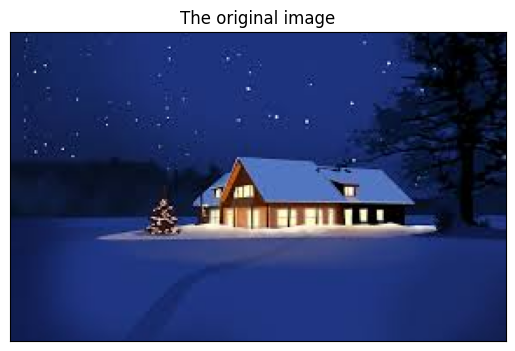

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests

# URL of the image
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSO530b2Cqjb98jJ3v0WCYzCarS-p_CXpc2Ig&s.png"

# Download the image using requests and convert it to a numpy array
response = requests.get(url, stream=True).content
image_np = np.frombuffer(response, np.uint8)

# Decode the image using OpenCV
image = cv2.imdecode(image_np, cv2.IMREAD_COLOR)

# Convert BGR to RGB for displaying
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.title('The original image')
plt.xticks([])
plt.yticks([])
plt.imshow(image_rgb)
plt.show()



## 1-Averaging filter
Below, you see how to define a very simple averaging kernel and apply it on your images.

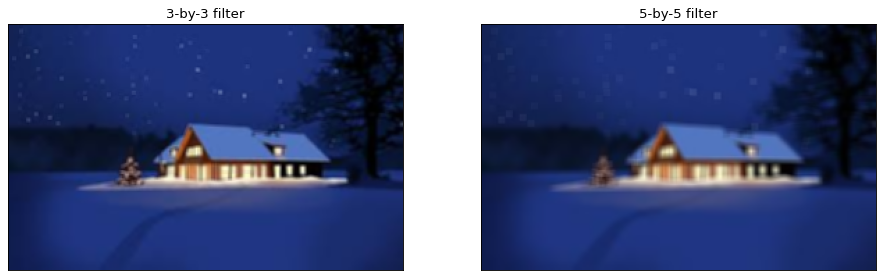

In [2]:
# Defining a kernel using numpy.
kernel_5 = np.ones((5,5),np.float32)/25
kernel_3 = np.ones((3,3),np.float32)/9

# Convolve the image with the kernel
filtered_5 = cv2.filter2D(image_rgb, -1, kernel_5)
filtered_3 = cv2.filter2D(image_rgb, -1, kernel_3)

# Plot the results in two subplots
fig = plt.figure(figsize=(14, 14), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(121), plt.imshow(filtered_3), plt.title('3-by-3 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(122), plt.imshow(filtered_5), plt.title('5-by-5 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.show()


Another simple way to apply a simple averaging filter is to use `cv2.blur()` function. The function can be applied as below:


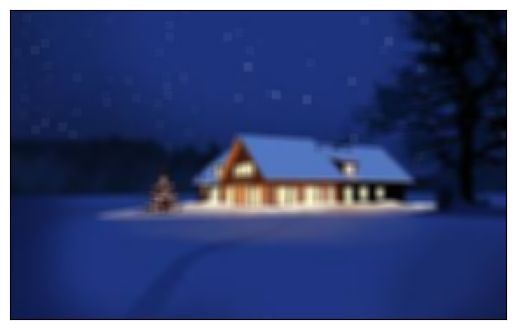

(<matplotlib.image.AxesImage at 0x78fba894aa40>,
 None,
 ([], []),
 ([], []),
 None)

In [3]:
# you can check the docs for further information.
blurred = cv2.blur(image_rgb, (5, 5), -1)
plt.imshow(blurred), plt.grid(False), plt.xticks([]), plt.yticks([]), plt.show()

## 2-Padding

As we mentioned earlier, one of the key factors in applying a filter over an image is to understand how to extrapolate the border values of the image while some parts of the kernel are dropped outside of the image border. "_borderType_" is the parameter which handles this functionality of kernels. Normally, the function is not called directly. It is used inside [FilterEngine](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#FilterEngine) and [copyMakeBorder()](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#void%20copyMakeBorder(InputArray%20src,%20OutputArray%20dst,%20int%20top,%20int%20bottom,%20int%20left,%20int%20right,%20int%20borderType,%20const%20Scalar&%20value) to compute tables for quick extrapolation. It means that we should first create the bordered (padded) image and then apply the filter over that image instead of the original image.

Various border types, image boundaries, are denoted with '|'

* BORDER_REPLICATE:    **_aaaaaa|abcdefgh|hhhhhhh_**
* BORDER_REFLECT:       **_fedcba|abcdefgh|hgfedcb_**
* BORDER_REFLECT_101:   **_gfedcb|abcdefgh|gfedcba_**
* BORDER_WRAP:          **_cdefgh|abcdefgh|abcdefg_**
* BORDER_CONSTANT:      **_iiiiii|abcdefgh|iiiiiii_**  with some specified 'i'


To create a bordered image we use the following command and args. Using this command you can insert different border sizes on each side of the image.

**cv2.copyMakeBorder(src, top, bottom, left, right, borderType[, dst[, value]])**

**src** – Source image.

**Size(src.cols+left+right, src.rows+top+bottom)**

_top, bottom, left, right_ – Parameter specifying how many pixels in each direction from the source image rectangle to extrapolate. For example,  `top=1, bottom=1, left=1, right=1` mean that 1 pixel-wide border needs to be built.

**borderType** – Border type. One of the border types declared above.

**value** – Border value if `borderType==BORDER_CONSTANT` .


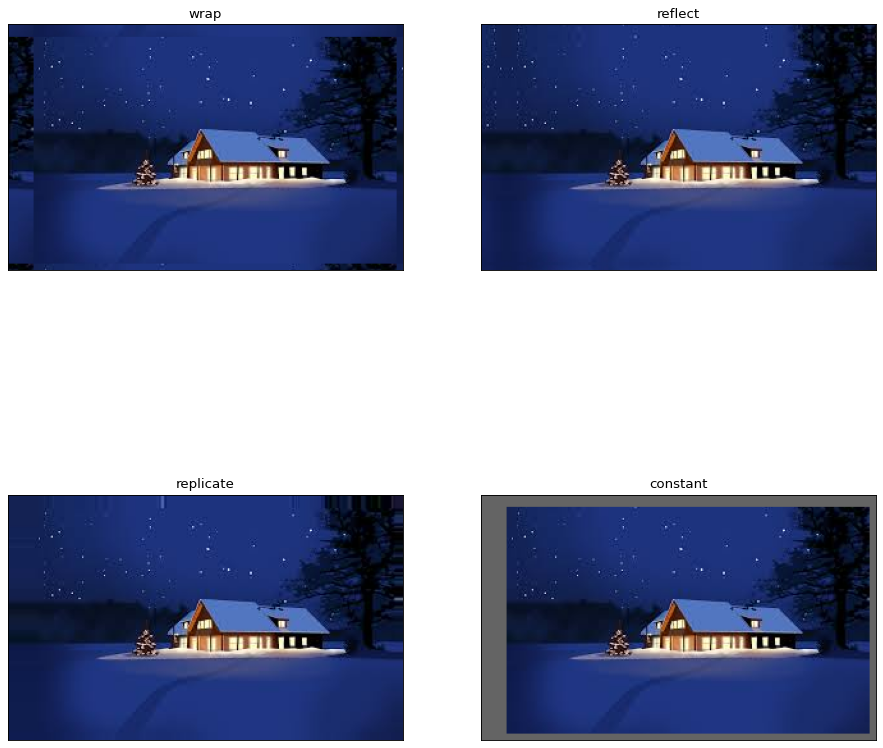

In [4]:
# Define the border dimensions
top, bottom, left, right = 10, 5, 20, 5
const = [100, 100, 100]  # Constant color for BORDER_CONSTANT (in RGB)

# Apply borders with different styles
img2 = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_WRAP)
img3 = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_REFLECT)
img4 = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_REPLICATE)
img5 = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=const)

# Convert all bordered images to RGB for displaying
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(14, 14), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(221), plt.imshow(img2_rgb), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('wrap')

plt.subplot(222), plt.imshow(img3_rgb), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('reflect')

plt.subplot(223), plt.imshow(img4_rgb), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('replicate')

plt.subplot(224), plt.imshow(img5_rgb), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('constant')

plt.show()

## 3-User-defined kernels

One can apply user-defined kernels just like the way we applied in section 1. For example, consider applying the following kernel (which is a vertical gradient filter) on the image.

$$\begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$$



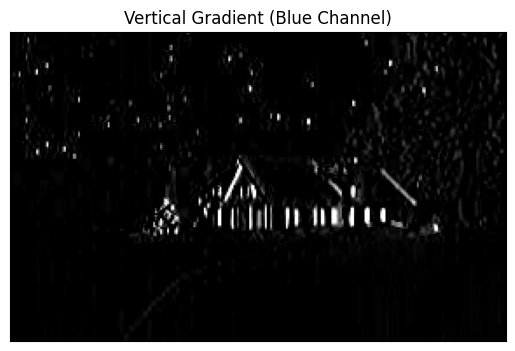

In [23]:
# Vertical gradient kernel
vertical_gd = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

# Apply the kernel to the blue channel (or you can use grayscale)
filter_v = cv2.filter2D(image[:, :, 2], -1, vertical_gd)

# Display the filtered result using a grayscale colormap
plt.imshow(filter_v, cmap='gray')
plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('Vertical Gradient (Blue Channel)')
plt.show()

## Sharpen

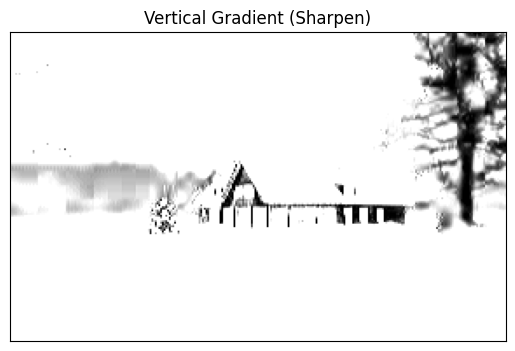

In [22]:
# Vertical gradient kernel sharpen
vertical_gd = np.array([[0, 1, 0], [-1, 5, -1], [0, 1, 0]])

# Apply the kernel to the blue channel (or you can use grayscale)
filter_sharpen = cv2.filter2D(image_rgb[:, :, 2], -1, vertical_gd)

# Display the filtered result using a grayscale colormap
plt.imshow(filter_sharpen, cmap='gray')
plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('Vertical Gradient (Sharpen)')
plt.show()

## Top Sobel

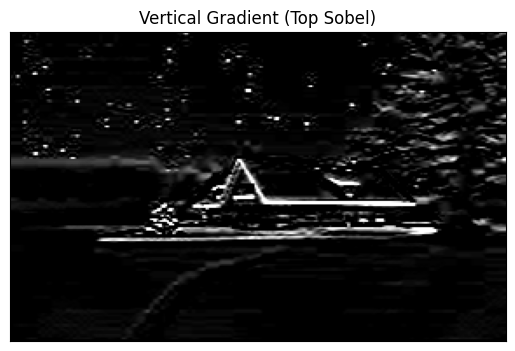

In [24]:
# Vertical gradient kernel top sobel
vertical_gd = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Apply the kernel to the blue channel (or you can use grayscale)
filter_v = cv2.filter2D(image_rgb[:, :, 2], -1, vertical_gd)

# Display the filtered result using a grayscale colormap
plt.imshow(filter_v, cmap='gray')
plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('Vertical Gradient (Top Sobel)')
plt.show()

## Blur

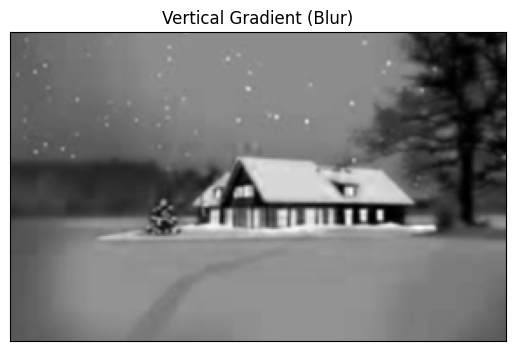

In [25]:
# Vertical gradient kernel blur
vertical_gd = np.array([[0.0625, 0.125, 0.0625], [0.125
, 0.25, 0.125], [0.0625, 0.125, 0.0625]])

# Apply the kernel to the blue channel (or you can use grayscale)
filter_blur = cv2.filter2D(image_rgb[:, :, 2], -1, vertical_gd)

# Display the filtered result using a grayscale colormap
plt.imshow(filter_blur, cmap='gray')
plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('Vertical Gradient (Blur)')
plt.show()

## Bottom Sobel

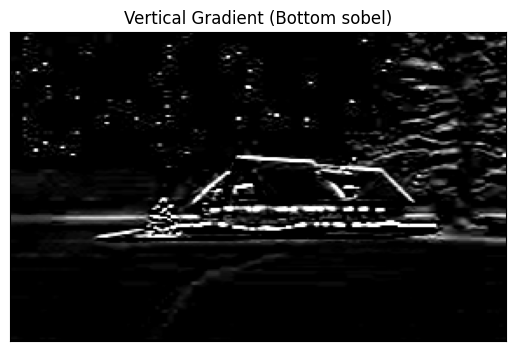

In [27]:
# Vertical gradient kernel
vertical_gd = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Apply the kernel to the blue channel (or you can use grayscale)
filter_bottomsobel = cv2.filter2D(image_rgb[:, :, 2], -1, vertical_gd)

# Display the filtered result using a grayscale colormap
plt.imshow(filter_bottomsobel, cmap='gray')
plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('Vertical Gradient (Bottom sobel)')
plt.show()

## Emboss

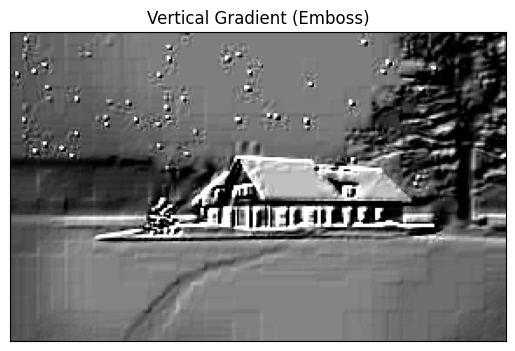

In [28]:
# Vertical gradient kernel
vertical_gd = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])

# Apply the kernel to the blue channel (or you can use grayscale)
filter_emboss = cv2.filter2D(image_rgb[:, :, 2], -1, vertical_gd)

# Display the filtered result using a grayscale colormap
plt.imshow(filter_emboss, cmap='gray')
plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('Vertical Gradient (Emboss)')
plt.show()

## Identity

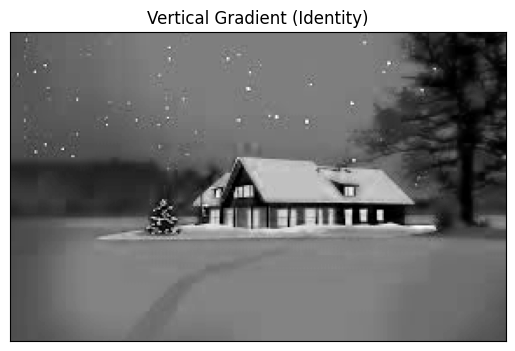

In [30]:
# Vertical gradient kernel
vertical_gd = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])

# Apply the kernel to the blue channel (or you can use grayscale)
filter_identity = cv2.filter2D(image_rgb[:, :, 2], -1, vertical_gd)

# Display the filtered result using a grayscale colormap
plt.imshow(filter_identity, cmap='gray')
plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('Vertical Gradient (Identity)')
plt.show()

## Outline (RGB)

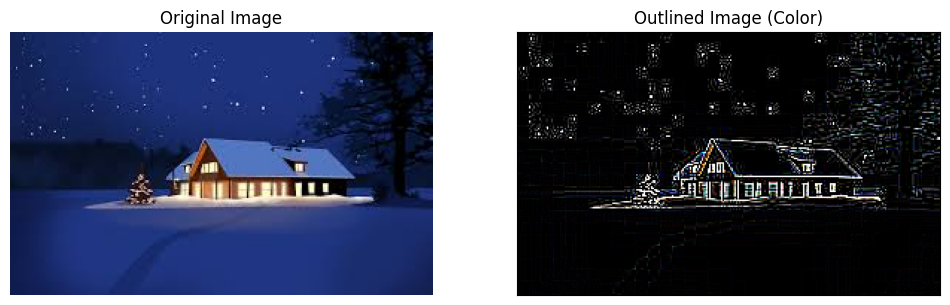

In [34]:
outline_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Inisialisasi gambar dengan outline
outline_image = np.zeros_like(image_rgb)

# Terapkan filter outline ke setiap saluran warna
for i in range(3):  # Iterasi untuk saluran RGB
    outline_image[:, :, i] = cv2.filter2D(image_rgb[:, :, i], -1, outline_kernel)

# Clip nilai untuk menjaga dalam rentang yang valid [0, 255]
outline_image = np.clip(outline_image, 0, 255).astype(np.uint8)

# Tampilkan gambar dengan outline
# Display the original and Sobel left edge-detected images
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(outline_image)
plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('Outlined Image (Color)')
plt.show()

## Left Sobel

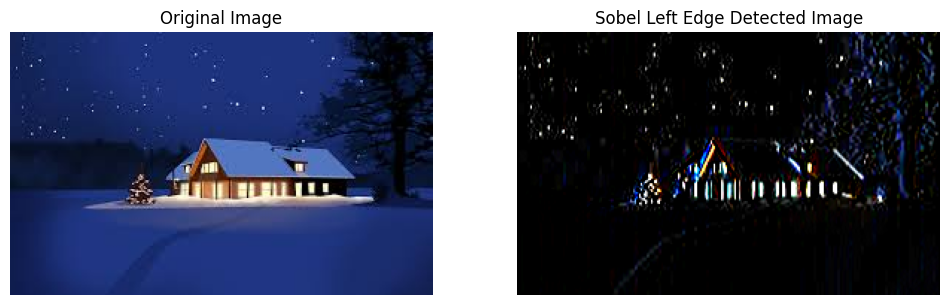

In [36]:
# Define the Sobel kernel for left edge detection
sobel_left_kernel = np.array([[ 1,  0, -1],
                               [ 2,  0, -2],
                               [ 1,  0, -1]])

# Initialize the image with Sobel left edges
sobel_image = np.zeros_like(image_rgb)

# Apply the Sobel filter to each color channel
for i in range(3):  # Iterate over RGB channels
    sobel_image[:, :, i] = cv2.filter2D(image_rgb[:, :, i], -1, sobel_left_kernel)

# Clip the values to keep them in the valid range [0, 255]
sobel_image = np.clip(sobel_image, 0, 255).astype(np.uint8)

# Display the original and Sobel left edge-detected images
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(sobel_image)
plt.title('Sobel Left Edge Detected Image')
plt.axis('off')

plt.show()

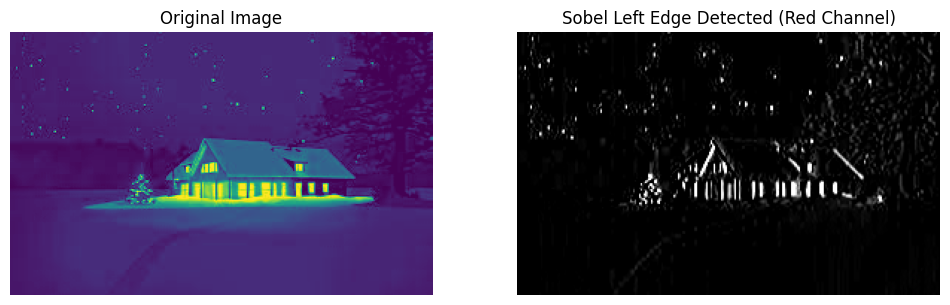

In [40]:
# Mendefinisikan kernel Sobel untuk deteksi tepi kiri
sobel_left_kernel = np.array([[ 1,  0, -1],
                               [ 2,  0, -2],
                               [ 1,  0, -1]])

# Inisialisasi gambar dengan Sobel left edges
sobel_image_red = np.zeros_like(image_rgb[:, :, 0])  # Hanya untuk saluran merah

# Terapkan filter Sobel hanya ke saluran merah
sobel_image_red = cv2.filter2D(image_rgb[:, :, 0], -1, sobel_left_kernel)

# Clip nilai untuk menjaga dalam rentang yang valid [0, 255]
sobel_image_red = np.clip(sobel_image_red, 0, 255).astype(np.uint8)

# Tampilkan gambar asli dan gambar hasil deteksi tepi Sobel pada saluran merah
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(image_rgb[:, :, 0])
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(sobel_image_red, cmap='gray')  # Tampilkan hasil dalam grayscale
plt.title('Sobel Left Edge Detected (Red Channel)')
plt.axis('off')



plt.show()

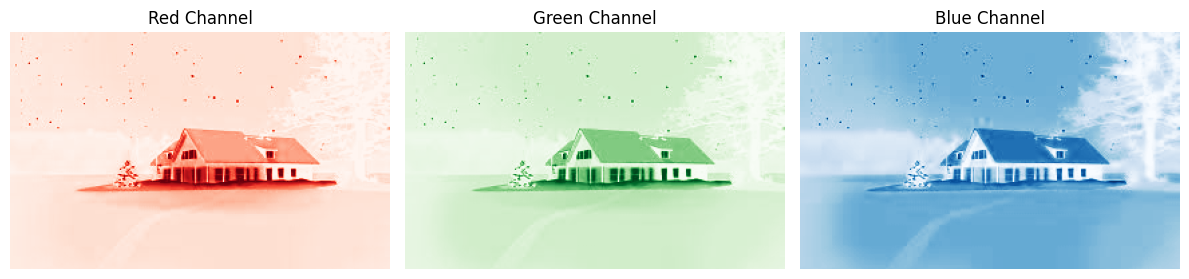

In [41]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mengambil setiap saluran warna
red_channel = image_rgb[:, :, 0]    # Saluran Merah
green_channel = image_rgb[:, :, 1]  # Saluran Hijau
blue_channel = image_rgb[:, :, 2]   # Saluran Biru

# Membuat subplot untuk menampilkan saluran warna
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(red_channel, cmap='Reds')  # Menampilkan saluran merah
plt.title('Red Channel')
plt.axis('off')

plt.subplot(132)
plt.imshow(green_channel, cmap='Greens')  # Menampilkan saluran hijau
plt.title('Green Channel')
plt.axis('off')

plt.subplot(133)
plt.imshow(blue_channel, cmap='Blues')  # Menampilkan saluran biru
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

## 4-Median filtering

Median filter is a non-linear filter which is very useful in removing or decreasing the salt-and-pepper noise. The _medianBlur_ function in OpenCV is designed to perform median filtering.

**cv2.medianBlur(src, ksize[, dst])**

**src** – input 1-, 3-, or 4-channel image; when ksize is 3 or 5, the image depth should be CV_8U, CV_16U, or CV_32F, for larger aperture sizes, it can only be CV_8U.

**ksize** – aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 ...

In order to better understand the effect of median filtering, we first add some noise to the image.

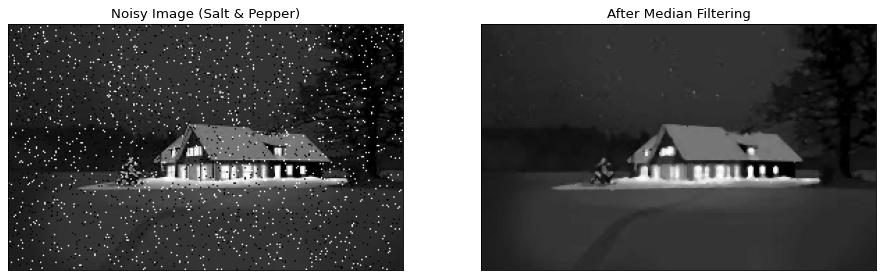

In [50]:
# Get the green channel (channel 1)
channel_2 = image[:, :, 1]

# Generate salt and pepper noise
s_and_p = np.random.rand(channel_2.shape[0], channel_2.shape[1])

# Define salt and pepper thresholds
salt = s_and_p > 0.975
pepper = s_and_p < 0.025

# Create noisy image (add noise to the green channel)
noisy = np.copy(channel_2)
noisy[salt] = 255
noisy[pepper] = 0

# Apply median filter with size 3 to reduce noise
Med = cv2.medianBlur(noisy, 3)

# Display the results
fig = plt.figure(figsize=(14, 14), dpi=80, facecolor='w', edgecolor='k')

# Show noisy image
plt.subplot(121)
plt.imshow(noisy, cmap='gray')
plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('Noisy Image (Salt & Pepper)')

# Show image after median filtering
plt.subplot(122)
plt.imshow(Med, cmap='gray')
plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('After Median Filtering')

plt.show()

## 5- Gaussian filtering

There are multiple ways to perform a gaussian filtering over an image:

*   using `cv2.GaussianBlur()` function,
*   and, using `cv2.sepFilter2D()` after creating two separate horizontal and vertical kernels and applying them.

But, first of all, we need to have a noisy image; specifically with gaussian noise added to it. To create such an image we use Numpy to create random gaussian noise and then add it to the image.

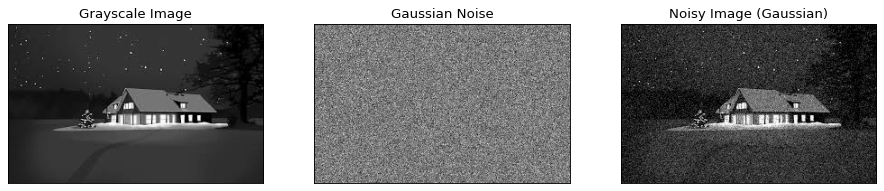

In [52]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create random Gaussian noise
mean = 0
sigma = 20.0
gauss_noise = np.random.normal(mean, sigma, gray.shape)

# Add Gaussian noise to the grayscale image
g_noisy = gray + gauss_noise

# Clip the noisy image to keep pixel values in the valid range [0, 255]
g_noisy = np.clip(g_noisy, 0, 255).astype(np.uint8)

# Showing the original grayscale image, the Gaussian noise, and the noisy image
fig = plt.figure(figsize=(14, 14), dpi=80, facecolor='w', edgecolor='k')

# Display grayscale image
plt.subplot(131), plt.xticks([]), plt.yticks([])
plt.imshow(gray, cmap='gray'), plt.grid(False), plt.title('Grayscale Image')

# Display Gaussian noise
plt.subplot(132), plt.xticks([]), plt.yticks([])
plt.imshow(gauss_noise, cmap='gray'), plt.grid(False), plt.title('Gaussian Noise')

# Display noisy image
plt.subplot(133), plt.xticks([]), plt.yticks([])
plt.imshow(g_noisy, cmap='gray'), plt.grid(False), plt.title('Noisy Image (Gaussian)')

plt.show()

(([], []), ([], []))

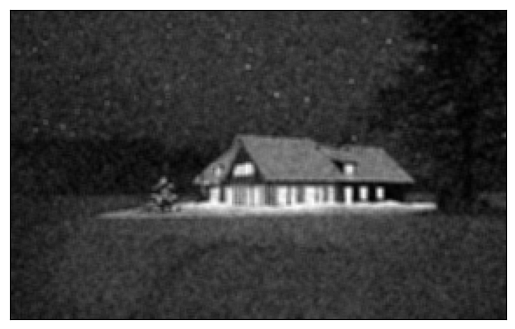

In [53]:
g_filtered = cv2.GaussianBlur(g_noisy, (3, 3), 20, 20)

# Display the result
plt.imshow(g_filtered, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

Gaussian Kernel:
 [[0.33319442]
 [0.33361117]
 [0.33319442]]


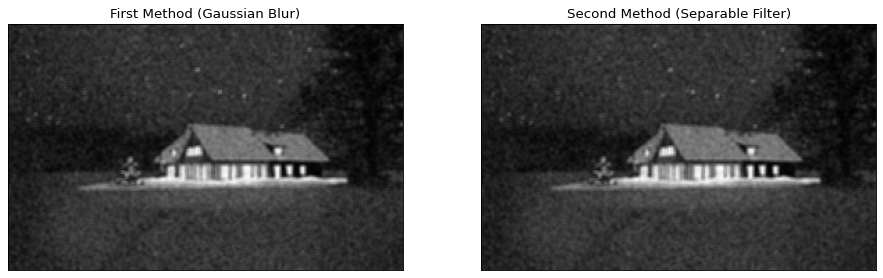

In [54]:
# Create random Gaussian noise
mean = 0
sigma = 20.0
gauss_noise = np.random.normal(mean, sigma, gray.shape)

# Add Gaussian noise to the grayscale image
g_noisy = gray + gauss_noise

# Clip the noisy image to keep pixel values in the valid range [0, 255]
g_noisy = np.clip(g_noisy, 0, 255).astype(np.uint8)

# Create a Gaussian kernel
g_kernel = cv2.getGaussianKernel(3, 20)
print("Gaussian Kernel:\n", g_kernel)

# Apply Gaussian blur using the standard method
g_filtered = cv2.GaussianBlur(g_noisy, (3, 3), 20)

# Apply the separable Gaussian filter
g_filtered_2 = cv2.sepFilter2D(g_noisy, -1, g_kernel, g_kernel)

# Displaying the results
fig = plt.figure(figsize=(14, 14), dpi=80, facecolor='w', edgecolor='k')

# Display first method
plt.subplot(121), plt.xticks([]), plt.yticks([]), plt.title('First Method (Gaussian Blur)')
plt.imshow(g_filtered, cmap='gray'), plt.grid(False)

# Display second method
plt.subplot(122), plt.xticks([]), plt.yticks([]), plt.title('Second Method (Separable Filter)')
plt.imshow(g_filtered_2, cmap='gray'), plt.grid(False)

plt.show()

Convolution and Padding described in this image

![Convolution and Padding described in this image](http://colah.github.io/posts/2014-07-Understanding-Convolutions/img/Wiki-BoxConvAnim.gif)